Возьмите датасет https://www.kaggle.com/ajayrana/hymenoptera-data
    
1 Реализуйте сверточную нейронную сеть с использованием tf.keras или keras. Используйте сверточные, пуллинговые и полносвязанные слои. Обучите на train выборке в течении 10 эпох, оцените качество на отложенной выборке
        
2 Добавьте в предыдущую архитектуру слои BatchNorm. Обучите на train выборке в течении 10 эпох, оцените качество на отложенной выборке
        
3 Создайте модель ResNet 50 (https://www.tensorflow.org/api_docs/python/tf/keras/applications/ResNet50), инициализированную случайными весами, и обучите ее на train выборке в течении 10 эпох, оцените качество на отложенной выборке
        
4 Создайте модель ResNet 50, инициализированную весами ImageNet, и обучите ее на train выборке в течении 10 эпох, оцените качество на отложенной выборке
        
Результат пришлите в виде Jupyter Notebook на github’е или расшаренного Google Colab-блокнота



In [1]:
import numpy
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [2]:
# image_size = (180, 180)
image_size = (224, 224)
batch_size = 32

In [3]:
 train_ds = tf.keras.preprocessing.image_dataset_from_directory(
     'hymenoptera_data/train/',
     validation_split=0.2,
     subset="training",
     seed=1,
     image_size=image_size,
     batch_size=batch_size,
 )

Found 245 files belonging to 2 classes.
Using 196 files for training.


In [4]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
     'hymenoptera_data/val/',
     validation_split=0.2,
     subset="validation",
     seed=1,
     image_size=image_size,
     batch_size=batch_size,
 )

Found 153 files belonging to 2 classes.
Using 30 files for validation.


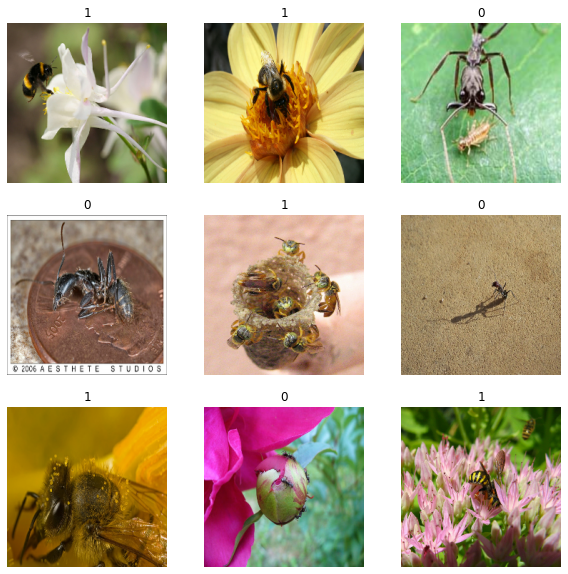

In [5]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(int(labels[i]))
        plt.axis("off")

In [6]:
train_ds = train_ds.prefetch(buffer_size=32)
val_ds = val_ds.prefetch(buffer_size=32)

In [7]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=32,
                           kernel_size=(9, 9),
                           padding='same',
                           activation='relu',
                           input_shape=(image_size[0], image_size[1], 3)),
    tf.keras.layers.Dropout(rate=0.2, noise_shape=None, seed=None),
#     tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(filters=64,
                           kernel_size=(7, 7),
                           padding='same',
                           activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2), padding='valid'),
    tf.keras.layers.Dropout(rate=0.2, noise_shape=None, seed=None),
#     tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(filters=128,
                           kernel_size=(5, 5),
                           padding='same',
                           activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2), padding='valid'),
    tf.keras.layers.Dropout(rate=0.2, noise_shape=None, seed=None),
#     tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(filters=256,
                           kernel_size=(3, 3),
                           padding='same',
                           activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2), padding='valid'),
    tf.keras.layers.Dropout(rate=0.2, noise_shape=None, seed=None),
#     tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Flatten(),
#     tf.keras.layers.Dropout(rate=0.2, noise_shape=None, seed=None),
#     tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(1, activation='relu')])

In [8]:
epochs = 10

# callbacks = [
#     keras.callbacks.ModelCheckpoint("save_at_{epoch}.h5"),
# ]
model.compile(
    optimizer=keras.optimizers.Adam(1e-3),
    loss="binary_crossentropy",
    metrics=["accuracy"],
)


In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 224, 224, 32)      7808      
_________________________________________________________________
dropout (Dropout)            (None, 224, 224, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 224, 224, 64)      100416    
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 64)      0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 112, 112, 64)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 112, 112, 128)     204928    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 56, 56, 128)       0

In [10]:
model.fit(
    train_ds, 
#     steps_per_epoch=7,
    epochs=epochs, validation_data=val_ds,
)

Epoch 1/10
7/7 [==============================] - 96s 13s/step - loss: 7.1955 - accuracy: 0.5193 - val_loss: 7.1163 - val_accuracy: 0.5333
Epoch 2/10
7/7 [==============================] - 98s 14s/step - loss: 7.4781 - accuracy: 0.5096 - val_loss: 7.1163 - val_accuracy: 0.5333
Epoch 3/10
7/7 [==============================] - 99s 14s/step - loss: 8.1601 - accuracy: 0.4649 - val_loss: 7.1163 - val_accuracy: 0.5333
Epoch 4/10
7/7 [==============================] - 98s 14s/step - loss: 7.5128 - accuracy: 0.5073 - val_loss: 7.1163 - val_accuracy: 0.5333
Epoch 5/10
7/7 [==============================] - 95s 13s/step - loss: 8.0946 - accuracy: 0.4692 - val_loss: 7.1163 - val_accuracy: 0.5333
Epoch 6/10
7/7 [==============================] - 109s 15s/step - loss: 8.0618 - accuracy: 0.4713 - val_loss: 7.1163 - val_accuracy: 0.5333
Epoch 7/10
7/7 [==============================] - 96s 13s/step - loss: 7.9963 - accuracy: 0.4756 - val_loss: 7.1163 - val_accuracy: 0.5333
Epoch 8/10
7/7 [==========

In [21]:
scores = model.evaluate(val_ds, verbose=0)
# print("Accuracy: %.2f%%" % (scores[1]*100))

In [23]:
print("Test loss:", scores[0])
print("Test accuracy:", scores[1])

Test loss: 7.116311073303223
Test accuracy: 0.5333333611488342


In [12]:
# from glob import glob
# files = glob('hymenoptera_data/val/ants/*.jpg') + glob('hymenoptera_data/val/bees/*.jpg')
# for file in files:
#     img = keras.preprocessing.image.load_img(file, target_size=image_size)
#     img_array = keras.preprocessing.image.img_to_array(img)
#     img_array = tf.expand_dims(img_array, 0)  # Create batch axis

#     predictions = model.predict(img_array)
#     score = predictions
#     print(score)
# #     print((100 * (1 - score), 100 * score))

In [13]:
model_0 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=32,
                           kernel_size=(9, 9),
                           padding='same',
                           activation='relu',
                           input_shape=(image_size[0], image_size[1], 3)),
    tf.keras.layers.Dropout(rate=0.2, noise_shape=None, seed=None),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(filters=64,
                           kernel_size=(7, 7),
                           padding='same',
                           activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2), padding='valid'),
    tf.keras.layers.Dropout(rate=0.2, noise_shape=None, seed=None),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(filters=128,
                           kernel_size=(5, 5),
                           padding='same',
                           activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2), padding='valid'),
    tf.keras.layers.Dropout(rate=0.2, noise_shape=None, seed=None),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(filters=256,
                           kernel_size=(3, 3),
                           padding='same',
                           activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2), padding='valid'),
    tf.keras.layers.Dropout(rate=0.2, noise_shape=None, seed=None),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Flatten(),
#     tf.keras.layers.Dropout(rate=0.2, noise_shape=None, seed=None),
#     tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(1, activation='relu')])

In [14]:
# epochs = 10

# callbacks = [
#     keras.callbacks.ModelCheckpoint("save_at_{epoch}.h5"),
# ]
model_0.compile(
    optimizer=keras.optimizers.Adam(1e-3),
    loss="binary_crossentropy",
    metrics=["accuracy"],
)


In [15]:
model_0.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 224, 224, 32)      7808      
_________________________________________________________________
dropout_4 (Dropout)          (None, 224, 224, 32)      0         
_________________________________________________________________
batch_normalization (BatchNo (None, 224, 224, 32)      128       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 224, 224, 64)      100416    
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 112, 112, 64)      0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 112, 112, 64)      0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 112, 112, 64)     

In [16]:
model_0.fit(
    train_ds,
#     steps_per_epoch=7,
    epochs=epochs, validation_data=val_ds,
)

Epoch 1/10
7/7 [==============================] - 111s 16s/step - loss: 7.1263 - accuracy: 0.5134 - val_loss: 8.2266 - val_accuracy: 0.4667
Epoch 2/10
7/7 [==============================] - 110s 15s/step - loss: 7.7802 - accuracy: 0.4926 - val_loss: 8.2266 - val_accuracy: 0.4667
Epoch 3/10
7/7 [==============================] - 105s 15s/step - loss: 8.0515 - accuracy: 0.4750 - val_loss: 8.2266 - val_accuracy: 0.4667
Epoch 4/10
7/7 [==============================] - 109s 15s/step - loss: 7.6371 - accuracy: 0.5017 - val_loss: 7.7208 - val_accuracy: 0.4667
Epoch 5/10
7/7 [==============================] - 124s 18s/step - loss: 6.0348 - accuracy: 0.6064 - val_loss: 7.1222 - val_accuracy: 0.5333
Epoch 6/10
7/7 [==============================] - 124s 17s/step - loss: 6.6317 - accuracy: 0.5677 - val_loss: 7.6363 - val_accuracy: 0.5000
Epoch 7/10
7/7 [==============================] - 117s 16s/step - loss: 6.7302 - accuracy: 0.5615 - val_loss: 7.1222 - val_accuracy: 0.5333
Epoch 8/10
7/7 [====

In [19]:
scores_0 = model_0.evaluate(val_ds, verbose=0)
# print("Accuracy: %.2f%%" % (scores_0[1]*100))

In [20]:
print("Test loss:", scores_0[0])
print("Test accuracy:", scores_0[1])

Test loss: 6.60800313949585
Test accuracy: 0.5666666626930237
